In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('Blues_r')

%matplotlib inline

DATEMAX = 13

In [2]:
def set_minmax(df, column):
  margin = 0.1
  data_min = df[column].min()
  data_max = df[column].max()
  data_rng = data_max - data_min
  
  plot_min = data_min - max(data_rng*margin, 1)
  plot_max = data_max + max(data_rng*margin, 1)
  
  return plot_min, plot_max

          iteration   bin_count  indexMinutes   num_Q_occu(total=48647.0)  \
count    294.000000  294.000000    294.000000                  294.000000   
mean    1977.078231  441.959184  24973.659864                 1240.697279   
std     2876.899121   12.103015    412.260811                 1405.636506   
min       27.000000  419.000000  21240.000000                    0.000000   
25%     1104.750000  435.000000  24949.000000                  226.000000   
50%     1633.500000  439.000000  24957.000000                  950.000000   
75%     2119.500000  444.000000  24962.000000                 1749.250000   
max    27087.000000  482.000000  25554.000000                 8955.000000   

        Q_occu_rate  
count    294.000000  
mean       2.550409  
std        2.889462  
min        0.000000  
25%        0.464571  
50%        1.952844  
75%        3.595802  
max       18.408124  
          iteration    bin_count  indexMinutes   num_Q_occu(total=48525.0)  \
count   1645.000000  1645.0000

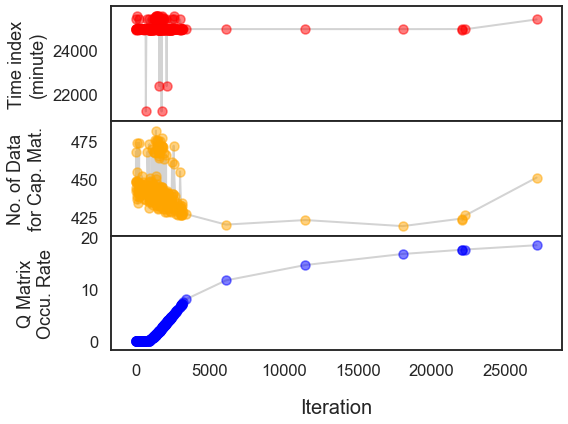

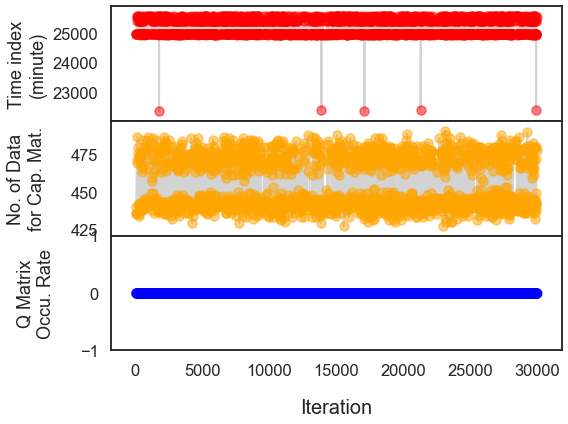

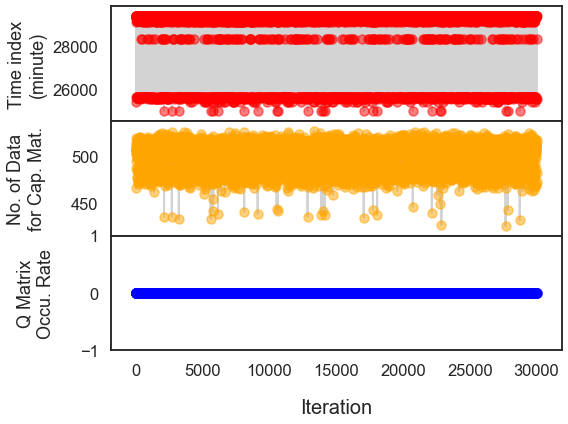

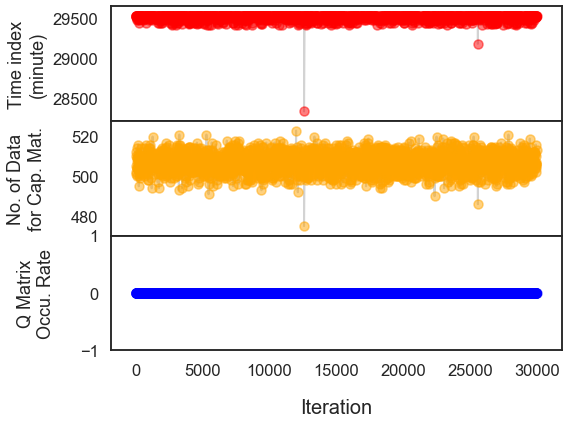

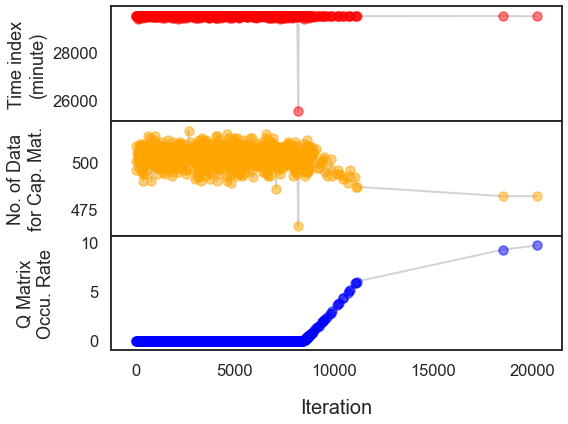

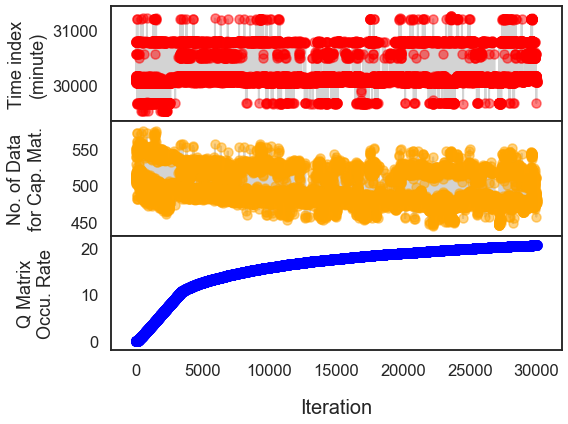

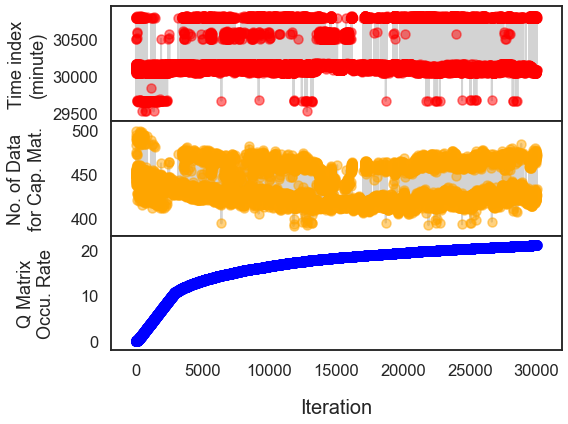

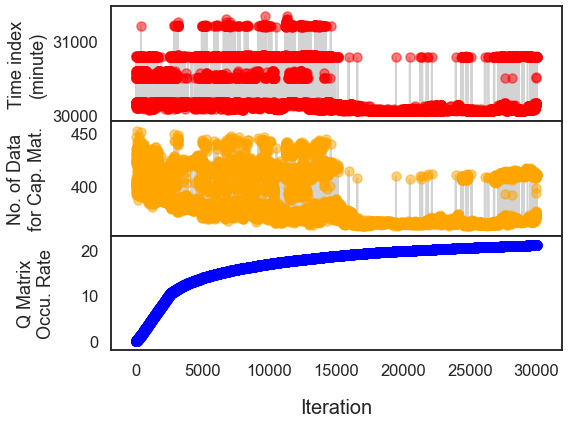

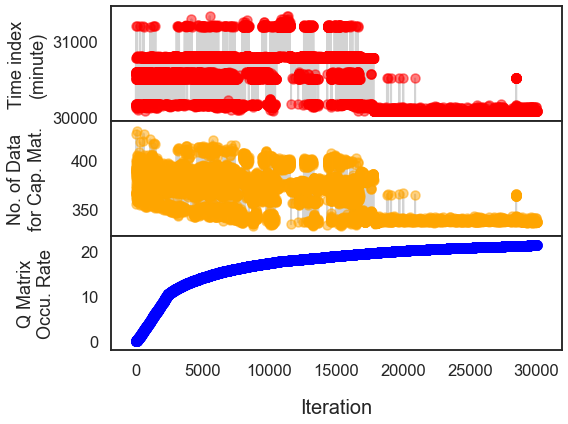

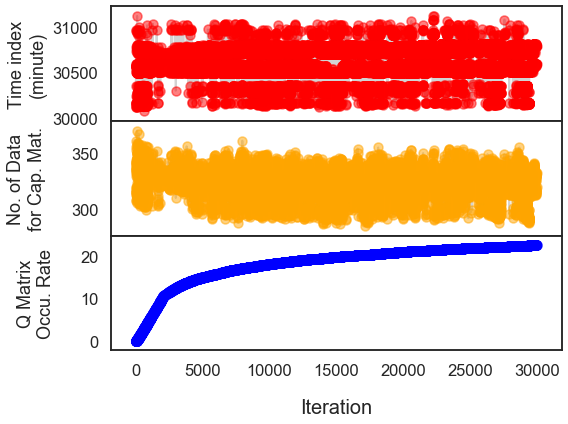

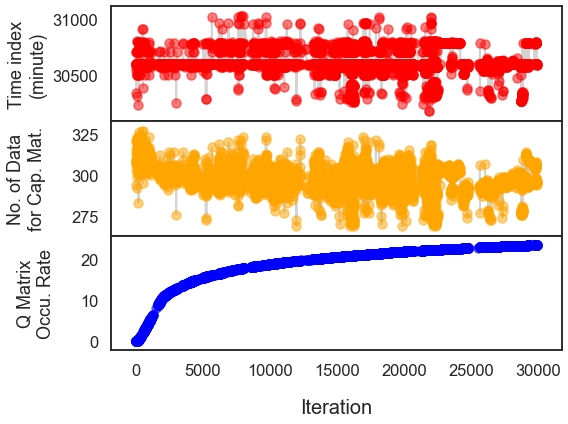

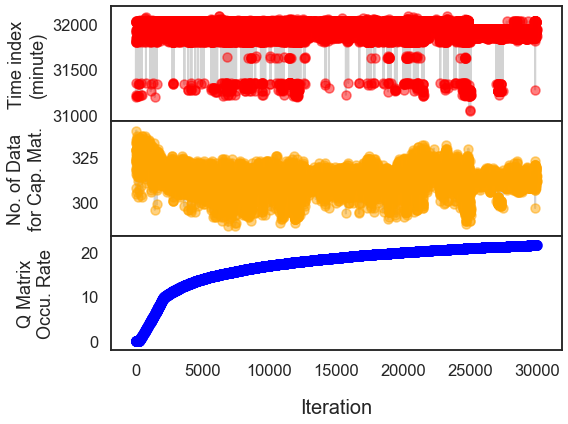

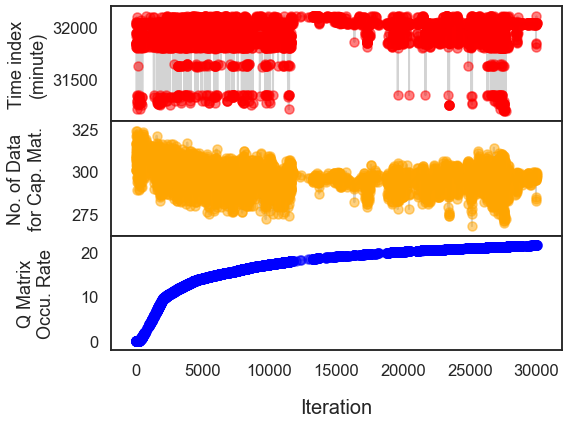

In [4]:
for date in range(DATEMAX):
  filename = 'procedure_{}_0.9_30000_3_ql_try1.csv'.format(date)
  data = pd.read_csv(filename)
  print(data.describe())

  fig, axes = plt.subplots(figsize=(8, 6), nrows=3, ncols=1, sharex=True, gridspec_kw = {'wspace':0, 'hspace':0})
  axes[0].scatter(data['iteration'], data['indexMinutes'], c='red', alpha=0.5)
  axes[0].plot(data['iteration'], data['indexMinutes'], linewidth=2, color='lightgrey', zorder=0)
  axes[0].set_ylabel('Time index\n(minute)', labelpad=6)
  axes[0].set_ylim(set_minmax(data, 'indexMinutes'))

  axes[1].scatter(data['iteration'], data[' bin_count'], c='orange', alpha=0.5)
  axes[1].plot(data['iteration'], data[' bin_count'], linewidth=2, color='lightgrey', zorder=0)
  axes[1].set_ylabel('No. of Data\nfor Cap. Mat.', labelpad=25)
  axes[1].set_ylim(set_minmax(data, ' bin_count'))

  axes[2].scatter(data['iteration'], data[' Q_occu_rate'], c='blue', alpha=0.5)
  axes[2].plot(data['iteration'], data[' Q_occu_rate'], linewidth=2, color='lightgrey', zorder=0)
  axes[2].set_xlabel('Iteration', labelpad=20, fontsize=20)
  axes[2].set_ylabel('Q Matrix\nOccu. Rate', labelpad=25)
  axes[2].set_ylim(set_minmax(data, ' Q_occu_rate'))

  plt.subplots_adjust(hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
  plt.tight_layout()
  plt.savefig('day_{}.png'.format(date))
